# Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
bank=pd.read_csv('/content/bank-full.csv',sep=';')

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
bank['job']=bank['job'].astype('category')
bank['marital']=bank['marital'].astype('category')
bank['education']=bank['education'].astype('category')
bank['default']=bank['default'].astype('category')
bank['housing']=bank['housing'].astype('category')
bank['loan']=bank['loan'].astype('category')
bank['contact']=bank['contact'].astype('category')
bank['month']=bank['month'].astype('category')
bank['poutcome']=bank['poutcome'].astype('category')
bank['y']=bank['y'].astype('category')

In [11]:
bank.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [12]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

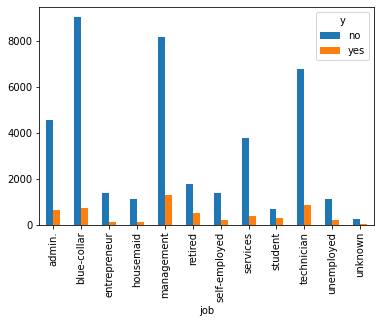

In [13]:
pd.crosstab(bank.job,bank.y).plot(kind='bar')

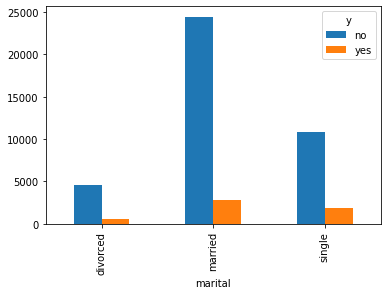

In [14]:
pd.crosstab(bank.marital,bank.y).plot(kind='bar')

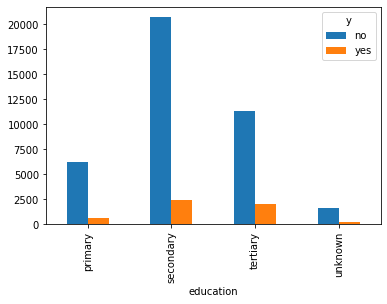

In [15]:
pd.crosstab(bank.education,bank.y).plot(kind='bar')

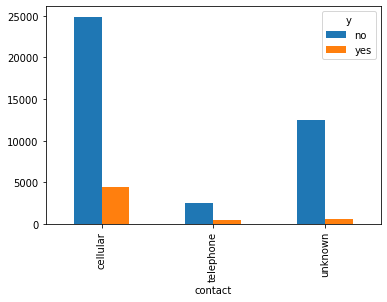

In [16]:
pd.crosstab(bank.contact,bank.y).plot(kind='bar')

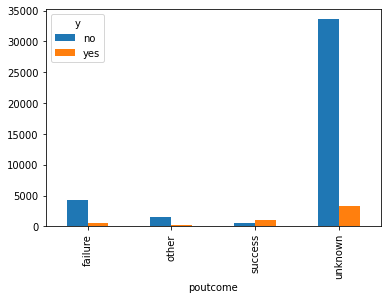

In [19]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')

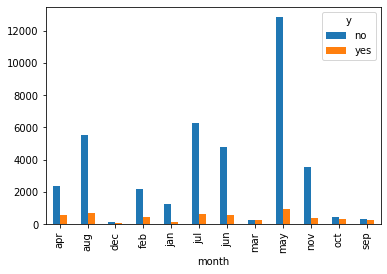

In [18]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')

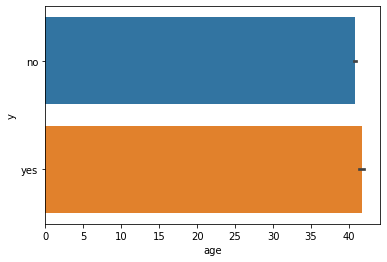

In [20]:
sns.barplot(x='age',y='y',data=bank)

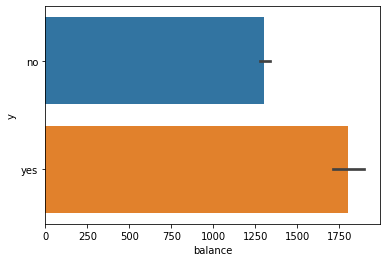

In [21]:
sns.barplot(x='balance',y='y',data=bank)

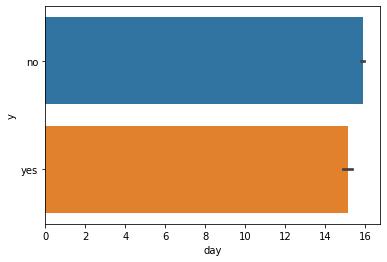

In [22]:
sns.barplot(x='day',y='y',data=bank)

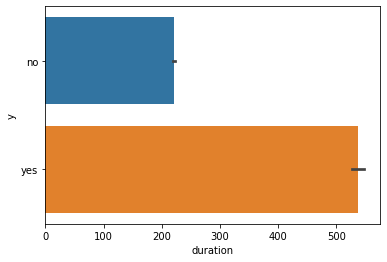

In [23]:
sns.barplot(x='duration',y='y',data=bank)

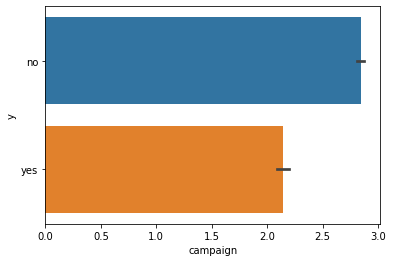

In [26]:
sns.barplot(x='campaign' , y='y' , data=bank)

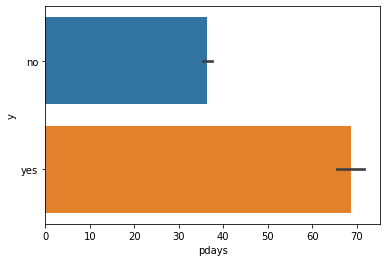

In [25]:
sns.barplot(x='pdays',y='y',data=bank)

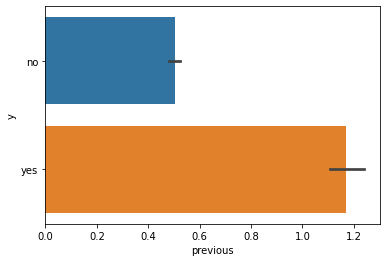

In [27]:
sns.barplot(x='previous',y='y',data=bank)

In [28]:
bank['default']=bank['default'].map({'yes':1,'no':0})

In [29]:
bank['loan']=bank['loan'].map({'yes':1,'no':0})

In [30]:
bank['housing']=bank['housing'].map({'yes':1,'no':0})

In [31]:
bank['y']=bank['y'].map({'yes':1,'no':0})

In [32]:
bank=pd.get_dummies(bank,columns=['job','education','marital','poutcome','contact','month'])

In [33]:
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
x=pd.concat([bank.iloc[:,0:10],bank.iloc[:,11:]],axis=1)
y=bank.iloc[:,10]

In [37]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: category
Categories (2, int64): [0, 1]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [43]:
LR=LogisticRegression()

In [44]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred=LR.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
vals=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

In [47]:
vals

,Actual Value,Predicted Value
3776,0,0
9928,0,0
33409,0,0
31885,0,1
15738,0,0
...,...,...
9016,0,0
380,0,0
7713,0,0
12188,0,0


In [48]:
#confusion matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[11733,   233],
       [ 1247,   351]])

In [49]:
#the model accuracy
(11719+366)/(11719+1232+366)

0.907486671172186

In [50]:
# The model Sensitivity is calculated by (T.P)/(T.P. + F.P)
11719/(11719+1232)

0.904872210640105

In [51]:
# The model Specificity is calculated by (T.N)/(T.N. + F.N)
366/(366+247)

0.5970636215334421

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.60      0.22      0.32      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [54]:
pred_prob=LR.predict_proba(x_test)

In [55]:
prob=pred_prob[:,1]

In [56]:
prob

array([0.02016133, 0.03804947, 0.15760062, ..., 0.03469314, 0.01476624,
       0.17959164])

<function matplotlib.pyplot.show(*args, **kw)>

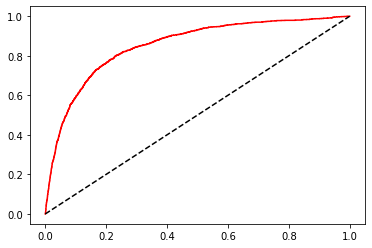

In [57]:
fpr,tpr,thersholds=roc_curve(y_test,prob)
plt.plot(fpr,tpr,color="red",label="logistic regression")
plt.xlabel=('false positive rate or [1-true negative rate]')
plt.ylabel=('true positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show